<a href="https://colab.research.google.com/github/apriliaagrn16/FingerSpell_Bangkit_Capstone/blob/main/Sign_Language_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengambil Dataset Dari repository github


In [ ]:
!git clone https://github.com/apriliaagrn16/FingerSpell_Bangkit_Capstone.git

In [2]:
!pip install tqdm

In [3]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

This project is run using google collab GPU.

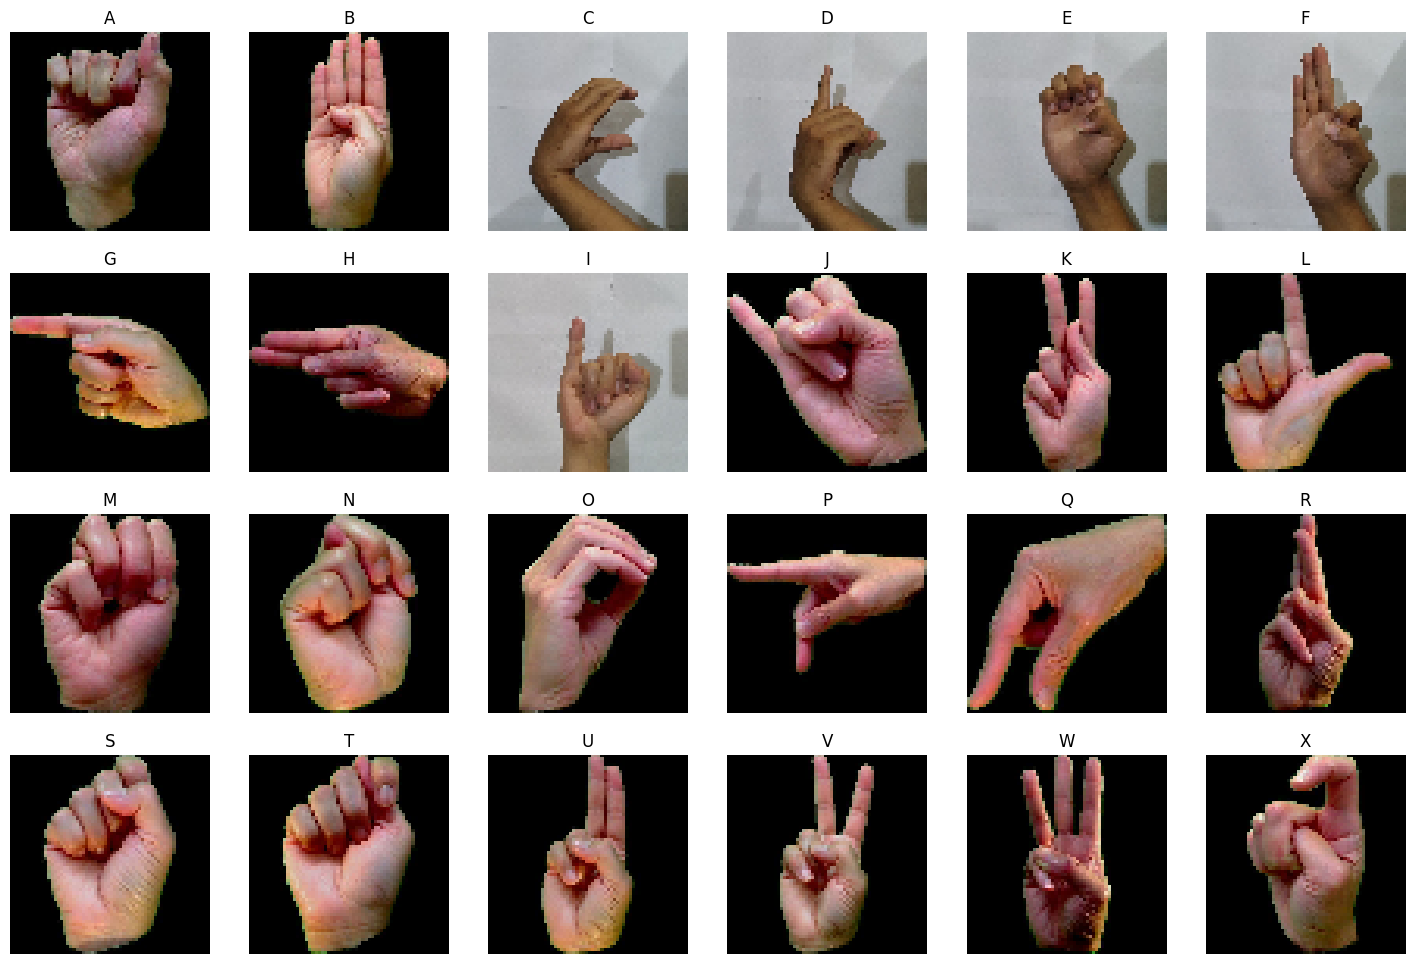

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Parameter grid
nrow, ncol = 4, 6
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)

# Loop through the grid
for row in range(nrow):
    for col in range(ncol):
        img_index = row * ncol + col  # Calculate numeric index
        img_char = chr(65 + img_index)  # Convert numeric index to char (A, B, C, ...)

        # Load image
        img = image.load_img('/content/FingerSpell_Bangkit_Capstone/TESTING1/testing_' + str(img_char) + '.jpg', target_size=(64, 64))

        # Display image
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title(img_char)
        plt.axis('off')

# Show the grid
plt.show()


This project aims to create a classifier that can intepret sign language for alphabet A to Z. The image of the sign language for respective alphabet is shown above.

Inside 'FingerSpell_Bangkit_capstone/DATASET/', the images of different sign language are organised according to their labels(i.e. A to Z). The dataset will first be divided into 3 sets : training_set, validation_set, and test_set. The size of training set, validation set, and test set are 70%, 15% and 15% of the whole dataset respectively.

To accomodate for the requirement for flow_from_directory method from keras, I will reorganise the images in the following structure :

* Training set : 'FingerSpell_Bangkit_capstone/DATASET/class_0A/image_file'
* Validation set : 'FingerSpell_Bangkit_capstone/DATASET/validation_set/class_0A/image_file'
* Test set : 'FingerSpell_Bangkit_capstone/DATASET/test_set/class_0A/image_file'

In [29]:
DATASET_PATH = '/content/FingerSpell_Bangkit_Capstone/DATASET'

In [6]:
# Creating a list of filename for training set, validation set, and test set
train_set = {}
validation_set = {}
test_set = {}
for cat in os.listdir(DATASET_PATH):
  cat_dir = os.path.join(DATASET_PATH, cat) # e.g. DATASET_PATH/'0'
  cat_files = os.listdir(cat_dir)
  # Training set's size is 70% of the data
  train_list , test_list = train_test_split(cat_files, test_size = 0.3)
  # Validation set's and Test set's size are both 15% of the data
  validation_list, test_list = train_test_split(test_list, test_size = 0.5)
  train_set[cat] = train_list
  validation_set[cat] = validation_list
  test_set[cat] = test_list

In [7]:
for cat in tqdm(train_set.keys()):
    cat_dir = os.path.join(DATASET_PATH, 'training_set', 'class_0' + cat)
    os.makedirs(cat_dir, exist_ok=True)  # Menambahkan exist_ok=True agar tidak ada error jika direktori sudah ada
    for file in train_set[cat]:
        # src path is DATASET_PATH/'A'/file
        src = os.path.join(DATASET_PATH, cat, file)
        # dest path is DATASET_PATH/'training_set'/'class_0A'
        # untuk menyesuaikan format direktori yang diperlukan oleh metode flow_from_directory di Keras
        dest = os.path.join(cat_dir, file)
        copyfile(src, dest)


100%|██████████| 26/26 [00:00<00:00, 67.48it/s]


In [8]:
for cat in tqdm(validation_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'validation_set', 'class_0' + cat)
  os.makedirs(cat_dir, exist_ok=True)
  for file in validation_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'validation_set'/'class_0A'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 26/26 [00:00<00:00, 396.46it/s]


In [9]:
for cat in tqdm(test_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'test_set', 'class_0' + cat)
  os.makedirs(cat_dir, exist_ok=True)
  for file in test_set[cat]:
    # src path is DATASET_PATH/'A'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'test_set'/'class_0A'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 26/26 [00:00<00:00, 425.55it/s]


In [17]:
# Loop through the alphabet letters
for letter in tqdm(train_set.keys()):
    train_size = len(train_set[letter])
    validation_size = len(validation_set[letter])
    test_size = len(test_set[letter])
    print("{} : Training size({}) Validation size({}) Test size({})".format(letter, train_size, validation_size, test_size))


100%|██████████| 26/26 [00:00<00:00, 1858.92it/s]

J : Training size(70) Validation size(15) Test size(15)
Z : Training size(70) Validation size(15) Test size(15)
S : Training size(70) Validation size(15) Test size(15)
X : Training size(70) Validation size(15) Test size(15)
U : Training size(70) Validation size(15) Test size(15)
T : Training size(70) Validation size(15) Test size(15)
V : Training size(70) Validation size(15) Test size(15)
E : Training size(70) Validation size(15) Test size(15)
C : Training size(70) Validation size(15) Test size(15)
A : Training size(70) Validation size(15) Test size(15)
Q : Training size(70) Validation size(15) Test size(15)
O : Training size(70) Validation size(15) Test size(15)
H : Training size(70) Validation size(15) Test size(15)
P : Training size(70) Validation size(15) Test size(15)
D : Training size(70) Validation size(15) Test size(15)
K : Training size(70) Validation size(15) Test size(15)
W : Training size(70) Validation size(15) Test size(15)
Y : Training size(70) Validation size(15) Test s

Data augmentation is performed on the training set images so that the classifier can learn any changes with respect to scaling, horizontal_flip, or others.

In [18]:
# Performing data augmentation on training dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# For validation dataset, only rescale the pictures
validation_datagen = ImageDataGenerator(rescale = 1./255)

# For test dataset, only rescale the pictures
test_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'training_set'),
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'validation_set'),
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'test_set'),
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1820 images belonging to 26 classes.
Found 390 images belonging to 26 classes.
Found 390 images belonging to 26 classes.


For this dataset, I will be using the following infrastructure.



In [19]:
# Initialising the CNN
classifier = Sequential()

# Adding first convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding second convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding third convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 26, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# Train the data with training set, and check the result with validation accuracy
history = classifier.fit_generator(training_data,
                         steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),
                         epochs = 100,
                         validation_data = validation_data,
                         validation_steps = math.ceil(validation_data.n / validation_data.batch_size))

<ipython-input-20-f65eebac0b05>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_data,


Epoch 1/100
57/57 [==============================] - 19s 235ms/step - loss: 3.2359 - accuracy: 0.0577 - val_loss: 3.1253 - val_accuracy: 0.1487
Epoch 2/100
57/57 [==============================] - 13s 231ms/step - loss: 2.7154 - accuracy: 0.1962 - val_loss: 2.1471 - val_accuracy: 0.3513
Epoch 3/100
57/57 [==============================] - 14s 244ms/step - loss: 2.0292 - accuracy: 0.3582 - val_loss: 1.7371 - val_accuracy: 0.4692
Epoch 4/100
57/57 [==============================] - 13s 236ms/step - loss: 1.7356 - accuracy: 0.4742 - val_loss: 1.5824 - val_accuracy: 0.5385
Epoch 5/100
57/57 [==============================] - 18s 319ms/step - loss: 1.5420 - accuracy: 0.5198 - val_loss: 1.4304 - val_accuracy: 0.5641
Epoch 6/100
57/57 [==============================] - 13s 232ms/step - loss: 1.4403 - accuracy: 0.5626 - val_loss: 1.3434 - val_accuracy: 0.5821
Epoch 7/100
57/57 [==============================] - 14s 239ms/step - loss: 1.2748 - accuracy: 0.6110 - val_loss: 1.1975 - val_accuracy:

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


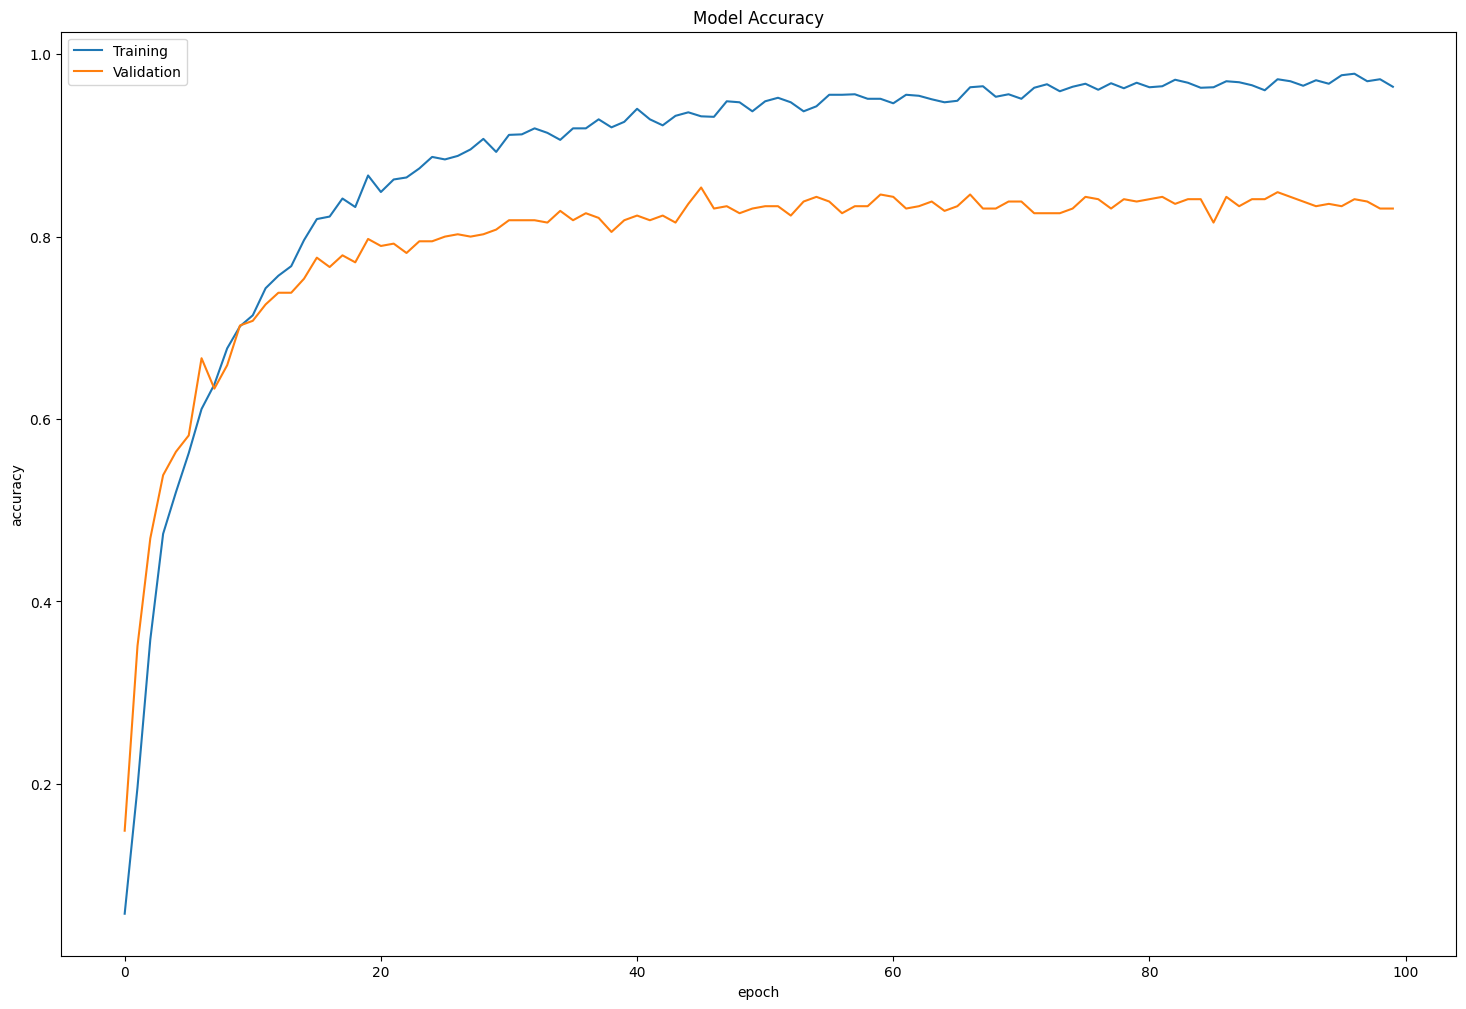

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])

From the accuracy plot, the validation accuracy differs from the training accuracy by a small extent indicating absence of overfitting. When the classifier is evaluated on the test set, it obtains a relatively high accuracy.

In [22]:
# Accuracy of the classifier when evaluated based on the test_set
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

<ipython-input-22-2f8d890b9def>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))


Accuracy on test set : 0.8641025424003601


To visualise the performance of the classifier, the classifier will be used to predict all the example images for 0 to 9.

1/1 [==============================] - 0s 22ms/step


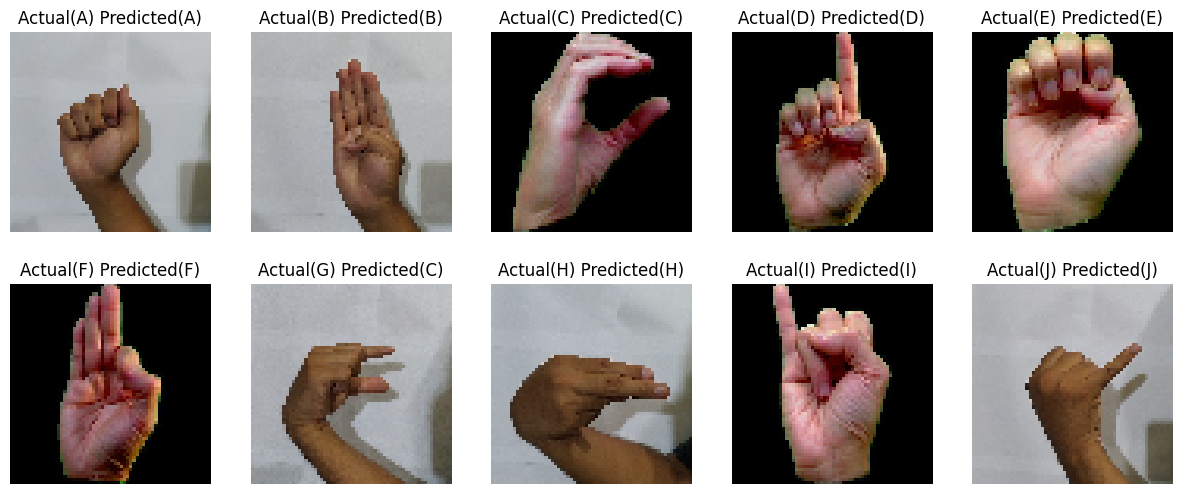

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Assume `classifier` is your pre-trained model
# Parameter grid
nrow, ncol = 2, 5
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)

# Loop through the grid
for row in range(nrow):
    for col in range(ncol):
        img_index = row * ncol + col  # Calculate numeric index
        img_char = chr(65 + img_index)  # Convert numeric index to char (A, B, C, ...)

        # Load image with dynamic name based on img_cha
        img_path = f'/content/FingerSpell_Bangkit_Capstone/TESTING2/testing_' + str(img_char) + '.jpg'
        img = image.load_img(img_path, target_size=(64, 64))

        # Convert image to array for prediction
        test_image = image.img_to_array(img)
        test_image = np.expand_dims(test_image, axis=0)

        # Predict image using classifier
        result_index = classifier.predict(test_image).argmax()
        result_char = chr(65 + result_index)  # Convert result index to char (A, B, C, ...)

        # Display image
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title(f"Actual({img_char}) Predicted({result_char})")
        plt.axis('off')

# Show the grid
plt.show()


It can be seen from above output that the classifier is able to classify all the images correctly. To save the model for future use, simply run the code below.

In [28]:
# save the models and weight for future purposes
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Reference

* https://www.kaggle.com/datasets/mrifqiazkiyaj/sibidatasets
* https://www.superdatascience.com/deep-learning/